# The three Body Problem

## 1. Setting the Baseline

First we need to import the libraries that we gonna use to conclude or baseline and then we need to load our initial dataset to a variable

In [409]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Information about the dataset
Train data: <br>
| Variable  | Description                                      |
|-----------|--------------------------------------------------|
| `t`       | timestep                                         |
| `x_1`     | coordinate x of the position of object 1         |
| `y_1`     | coordinate y of the position of object 1         |
| `v_x_1`   | coordinate x of the velocity of object 1         |
| `v_y_1`   | coordinate y of the velocity of object 1         |
| `x_2`     | coordinate x of the position of object 2         |
| `y_2`     | coordinate y of the position of object 2         |
| `v_x_2`   | coordinate x of the velocity of object 2         |
| `v_y_2`   | coordinate y of the velocity of object 2         |
| `x_3`     | coordinate x of the position of object 3         |
| `y_3`     | coordinate y of the position of object 3         |
| `v_x_3`   | coordinate x of the velocity of object 3         |
| `v_y_3`   | coordinate y of the velocity of object 3         |

Test data:<br>

| Variable  | Description                                                    |
|-----------|----------------------------------------------------------------|
| `t`       | timestep                                                       |
| `x0_1`    | coordinate x of the position of object 1 at time t=0           |
| `y0_1`    | coordinate y of the position of object 1 at time t=0           |
| `x0_2`    | coordinate x of the position of object 2 at time t=0           |
| `y0_2`    | coordinate y of the position of object 2 at time t=0           |
| `x0_3`    | coordinate x of the position of object 3 at time t=0           |
| `y0_3`    | coordinate y of the position of object 3 at time t=0           |

For the test data, we only have the initial positions, and we assume that the initial velocity is zero

### 1st Step

Initially we need to check how many point each trajectory should have.

In [410]:
# we get the initial data that we are gonna use to train our model
initial_df:pd.DataFrame = pd.read_csv("../data/mlNOVA/mlNOVA/X_train.csv")

# we verify the optimal size for each trajectory
# we test 256/257/258 all close values to the given value
n:int = 1
while True:
    if n*257 > initial_df.iloc[-1,-1]:
        break
    print(initial_df.iloc[n*257,0])
    n+=1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


### 2nd Step
Now we are gonna atribute to each trajectory an id for when we clean the code we dont lose trajectories even the ones that will lost some points because their values are just zeros.

In [411]:
# atribute a new column to the data, and for each 257 lines
num_lines_per_trajectory:int = 257
num_trajectories:int = len(initial_df) // num_lines_per_trajectory

# Cria a coluna Id_Trajectory
id_trajectory_list:list[int] = [i // num_lines_per_trajectory for i in range(len(initial_df))]
initial_df['Id_Trajectory'] = id_trajectory_list

# we save the data to check if the ids are given correctly
#initial_df.to_csv('nome_do_arquivo.csv', index=False)

# we can also show some lines to give an general check
initial_df.head()

# Get the number of rows
print(f"The initial dataset has {initial_df.shape[0]} rows.")

The initial dataset has 1285000 rows.


### 3rd Step
Now we are gonna start to clean all the trash in our data like the lines with just  0 values and some more things

In [412]:
# Keep rows where not all values in the row are 0.0
cleaned_df: pd.DataFrame = initial_df.loc[~(initial_df.drop(columns=['Id', 'Id_Trajectory']) == 0).all(axis=1)]

# Display the cleaned dataset
cleaned_df.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,Id_Trajectory
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4,0


### 4th Step - Training

Now we gonna divide into 2 sets the data using the ids to ensure that both sets dont have a certain trajectory divided in half. but first we are gonna retirieve  the training data that is about 80% of our data

#### Features

In [413]:
# Group by 'trajectory_id' and get the first occurrence of each group
first_occurrence = cleaned_df.groupby('Id_Trajectory').first().reset_index()
# Merge first occurrence back to the original dataframe, only replacing columns that need to be kept 
# constant(all least the fist ones of each group)
columns_to_replace = cleaned_df.columns.difference(['t', 'Id_Trajectory', 'Id'])  # Columns to replace except 't' and 'trajectory_id'
# We merge 'first_occurrence' on 'trajectory_id' with the original dataframe,
# and only replace the required columns.
X_raw = cleaned_df[['t', 'Id_Trajectory', 'Id']].merge(
    first_occurrence[['Id_Trajectory'] + list(columns_to_replace)],
    on='Id_Trajectory',
    how='left'
)
# Reorder the columns
X_raw = X_raw[['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id', 'Id_Trajectory']]


# Get the number of total trajectories (Id_trajectory)
total_trajectories:int = len(set(id_trajectory_list))

# Calculate the number of trajectories for training (80%) and testing (20%)
train_size = int(total_trajectories * 0.8)

# Divide into train and test dataframes
x_train: pd.DataFrame = X_raw[X_raw['Id_Trajectory'] <= train_size][['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3']]
x_train

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3
0,0.000000,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0
1,0.039062,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0
2,0.078125,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0
3,0.117188,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0
4,0.156250,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
873715,1.445310,1.0,0.0,0.0,0.0,-0.476426,0.586245,0.0,0.0,-0.523574,-0.586245,0.0,0.0
873716,1.484380,1.0,0.0,0.0,0.0,-0.476426,0.586245,0.0,0.0,-0.523574,-0.586245,0.0,0.0
873717,1.523440,1.0,0.0,0.0,0.0,-0.476426,0.586245,0.0,0.0,-0.523574,-0.586245,0.0,0.0
873718,1.562500,1.0,0.0,0.0,0.0,-0.476426,0.586245,0.0,0.0,-0.523574,-0.586245,0.0,0.0


#### Target

In [414]:
# Target
Y_raw = cleaned_df[['x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id', 'Id_Trajectory']]
y_train: pd.DataFrame = Y_raw[Y_raw['Id_Trajectory']<=train_size][['x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3']]


### 4th Step - Test

Now we are gonna retrieve the test data that we want that is the features to then predict the target

In [415]:
X_test = X_raw[X_raw['Id_Trajectory'] > train_size][['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3']]
y_test: pd.DataFrame = Y_raw[Y_raw['Id_Trajectory']> train_size][['x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3']]

### 5th Step
Now we are gonna use the pipeline standardizes features using StandardScaler to ensure balanced scaling of input data, and applies linear regression to establish a relationship between initial conditions and final positions, minimizing prediction errors.

In [416]:
import matplotlib.pyplot as plt

def plot_y_yhat(y_test,y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_test) > MAX:
        idx = np.random.choice(len(y_test),MAX, replace=False)
    else:
        idx = np.arange(len(y_test))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_test[idx,i])
        x1 = np.max(y_test[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_test[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig(plot_title+'.pdf')
    plt.show()

# Model with velocities

0.04819950551776609


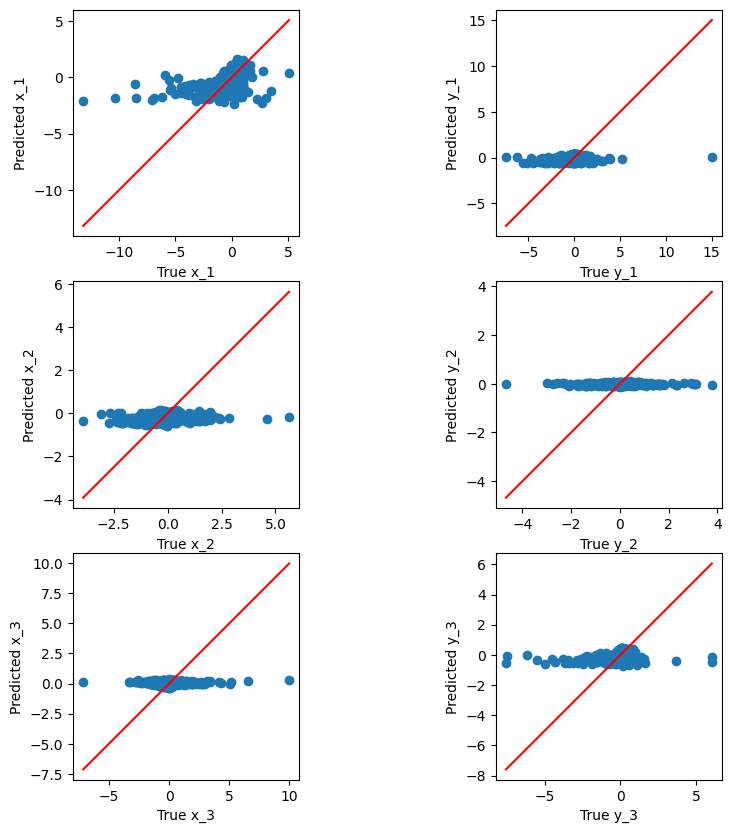

In [417]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Criar um pipeline com duas etapas: escalonamento dos dados e regressão linear
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalizar os dados
    ('regressor', LinearRegression())  # Aplicar Regressão Linear
])

# Treinar o modelo com os dados de treinamento
model= pipeline.fit(x_train, y_train)

print(model.score(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)

plot_y_yhat(y_test.values, y_pred, plot_title="LinearRegression_Predictions_with_velocities")

# Model without velocities

0.08460158091994811


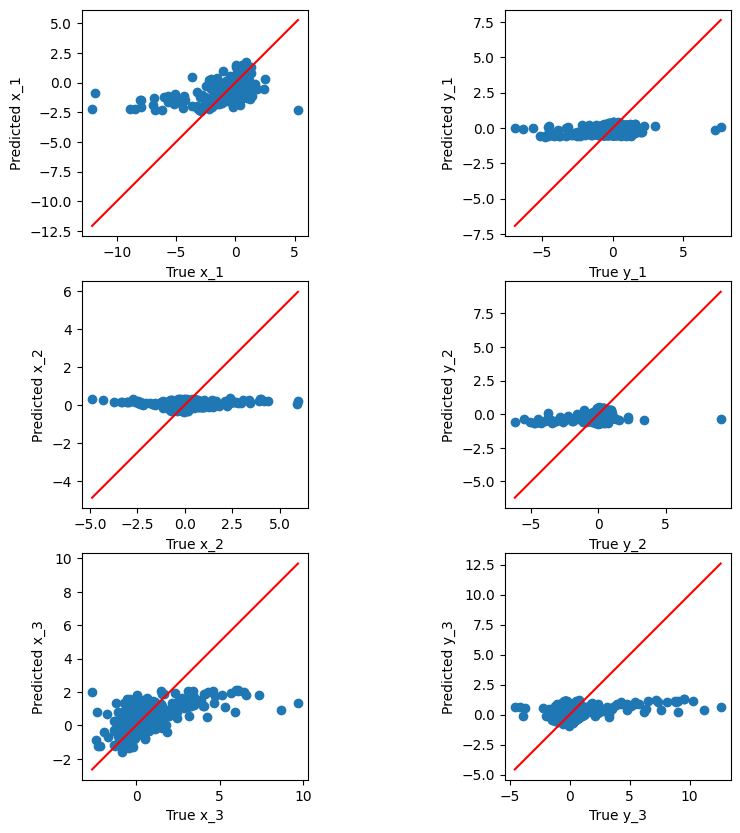

In [418]:
# Training variables
x_train: pd.DataFrame = X_raw[X_raw['Id_Trajectory'] <= train_size][['t', 'x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']]
y_train: pd.DataFrame = Y_raw[Y_raw['Id_Trajectory']<=train_size][['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']]

# Test variables
X_test = X_raw[X_raw['Id_Trajectory'] > train_size][['t', 'x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']]
y_test: pd.DataFrame = Y_raw[Y_raw['Id_Trajectory']> train_size][['x_1', 'y_1', 'x_2', 'y_2','x_3', 'y_3']]

# Treinar o modelo com os dados de treinamento
model= pipeline.fit(x_train, y_train)

print(model.score(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)

plot_y_yhat(y_test.values, y_pred, plot_title="LinearRegression_Predictions_without_velocities")

# Decisão tomada

Decidimos em grupo utilizar o código do Filipe pois já englobava uma escolha random do ids o que permitiu um melhor treinamento do modelo